In [36]:
# Create empty raw_definitions, to hold definiendum, short definiendum (abbreviation of definiens), and definiens.
raw_definitions = []

In [37]:
# Needed if importing the terminology from a CSV file.
import csv

In [38]:
# Fill raw_definitions as a list of triples, where a triple includes the definiendum, short definiendum, and definiens.
with open('ilang_SRN_terminology - Sheet1.csv') as raw_definitions_file:
    raw_definitions_csv = csv.reader(raw_definitions_file, delimiter = ',')
    for row in raw_definitions_csv:
        raw_definitions.append({'definiendum':row[0], 'short definiendum':row[1], 'definiens':row[2]})

In [39]:
# Show raw_definitions content and size.

In [40]:
print(raw_definitions)
len(raw_definitions)

[{'definiendum': 'Definiendum', 'short definiendum': 'Short Definiendum', 'definiens': 'Definiens'}, {'definiendum': 'SRN', 'short definiendum': 'SRN', 'definiens': 'Smart Retail Network software.'}, {'definiendum': 'SDM', 'short definiendum': 'SDM', 'definiens': 'Shop Display Management software.'}, {'definiendum': 'Shop Display', 'short definiendum': 'Shop Display', 'definiens': 'Object installed at a POP, which is used to promote products; Shop Display is synonym with Fixture.'}, {'definiendum': 'Basic Shop Display', 'short definiendum': 'BSD', 'definiens': 'A Shop Display which cannot itself be subdivided.'}, {'definiendum': 'Complex Shop Display', 'short definiendum': 'CSD', 'definiens': 'A Shop Display made from two or more Basic Shop Displays.'}, {'definiendum': 'Shop Display Identifier', 'short definiendum': 'SDID', 'definiens': 'Unique numeric identifier generated by SDM for each BSD, used to identify a BSD when a QR code scanner is not available.'}, {'definiendum': 'Shop Disp

16

In [41]:
# Define a function needed to ignore case, when searching for occurrences of definiendum and short definiendum in definiens.

In [42]:
import unicodedata
def normalize_caseless(text):
    return unicodedata.normalize("NFKD", text.casefold())

In [55]:
# Create an empry term dependencies network, to hold dependencies of definitions on terms.

In [60]:
term_dependency_network = []

In [61]:
# Make the term dependency network as follows, and fill it into term_dependency_network:
# If a definiendum or short definendum A appears in a definiens of B, then definiendum B depends on definiendum A.
for i in raw_definitions:
    for j in raw_definitions:
        if (normalize_caseless(i['definiendum']) in normalize_caseless(j['definiens'])) or (normalize_caseless(i['short definiendum']) in normalize_caseless(j['definiens'])):
            term_dependency_network.append({'definiendum':j['definiendum'], 'depends on':i['definiendum']})
            print(j['definiendum'], '--depends on->', i['definiendum'])

# Show term_dependency_network size.
len(term_dependency_network)

Report --depends on-> SRN
Analyst --depends on-> SRN
Administrator --depends on-> SRN
Shop Display Identifier --depends on-> SDM
Report --depends on-> SDM
SDM --depends on-> Shop Display
Shop Display --depends on-> Shop Display
Basic Shop Display --depends on-> Shop Display
Complex Shop Display --depends on-> Shop Display
Shop Display Supplier --depends on-> Shop Display
Complex Shop Display --depends on-> Basic Shop Display
Shop Display Identifier --depends on-> Basic Shop Display
Shop Display --depends on-> Point of Purchase
Field Merchandiser --depends on-> Point of Purchase
POP Personnel --depends on-> Point of Purchase
POP Data --depends on-> Point of Purchase
Report --depends on-> Point of Purchase
Field Merchandiser --depends on-> Field Merchandiser
Key Account --depends on-> Field Merchandiser
POP Data --depends on-> Field Merchandiser
Report --depends on-> POP Data


21

In [68]:
print(term_dependency_network)

[{'definiendum': 'Report', 'depends on': 'SRN'}, {'definiendum': 'Analyst', 'depends on': 'SRN'}, {'definiendum': 'Administrator', 'depends on': 'SRN'}, {'definiendum': 'Shop Display Identifier', 'depends on': 'SDM'}, {'definiendum': 'Report', 'depends on': 'SDM'}, {'definiendum': 'SDM', 'depends on': 'Shop Display'}, {'definiendum': 'Shop Display', 'depends on': 'Shop Display'}, {'definiendum': 'Basic Shop Display', 'depends on': 'Shop Display'}, {'definiendum': 'Complex Shop Display', 'depends on': 'Shop Display'}, {'definiendum': 'Shop Display Supplier', 'depends on': 'Shop Display'}, {'definiendum': 'Complex Shop Display', 'depends on': 'Basic Shop Display'}, {'definiendum': 'Shop Display Identifier', 'depends on': 'Basic Shop Display'}, {'definiendum': 'Shop Display', 'depends on': 'Point of Purchase'}, {'definiendum': 'Field Merchandiser', 'depends on': 'Point of Purchase'}, {'definiendum': 'POP Personnel', 'depends on': 'Point of Purchase'}, {'definiendum': 'POP Data', 'depends 

In [111]:
# Create an empty networkx graph to hold the term dependency network
import networkx as nx
tdn_graph = nx.DiGraph()

In [112]:
# Add to tdn_graph a directed edge for each term dependency in term_dependency_network.
for i in term_dependency_network:
    tdn_graph.add_edge(i['definiendum'], i['depends on'], label = 'depends')

In [115]:
# Show edges and nodes of tdn_graph.
print(tdn_graph.edges)
print(tdn_graph.nodes)

[('Report', 'SRN'), ('Report', 'SDM'), ('Report', 'Point of Purchase'), ('Report', 'POP Data'), ('Analyst', 'SRN'), ('Administrator', 'SRN'), ('Shop Display Identifier', 'SDM'), ('Shop Display Identifier', 'Basic Shop Display'), ('SDM', 'Shop Display'), ('Shop Display', 'Shop Display'), ('Shop Display', 'Point of Purchase'), ('Basic Shop Display', 'Shop Display'), ('Complex Shop Display', 'Shop Display'), ('Complex Shop Display', 'Basic Shop Display'), ('Shop Display Supplier', 'Shop Display'), ('Field Merchandiser', 'Point of Purchase'), ('Field Merchandiser', 'Field Merchandiser'), ('POP Personnel', 'Point of Purchase'), ('POP Data', 'Point of Purchase'), ('POP Data', 'Field Merchandiser'), ('Key Account', 'Field Merchandiser')]
['Report', 'SRN', 'Analyst', 'Administrator', 'Shop Display Identifier', 'SDM', 'Shop Display', 'Basic Shop Display', 'Complex Shop Display', 'Shop Display Supplier', 'Point of Purchase', 'Field Merchandiser', 'POP Personnel', 'POP Data', 'Key Account']


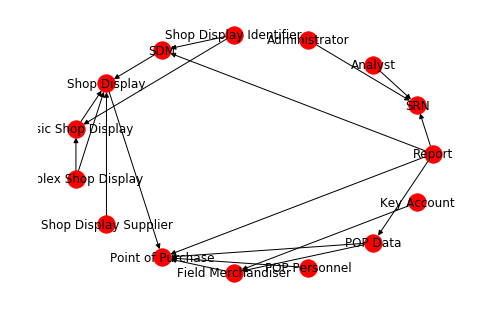

In [126]:
# Draw tdn_graph.
import matplotlib.pyplot as plt
nx.draw_circular(tdn_graph, arrows=True, with_labels=True)